In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv("iris.data.csv")
data



,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
# Put the column name as Sepal Length (in cm) Sepal Width (in cm) Petal Length (in cm) Petal Width (in cm) Species (Target class)

df = pd.DataFrame(data)

df = df.rename(columns={
    '5.1': 'SepalLength',
    '3.5': 'SepalWidth',
    '1.4': 'PetalLength',
    '0.2': 'PetalWidth',
    'Iris-setosa':'Species'
})
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


# Creating test and train data 

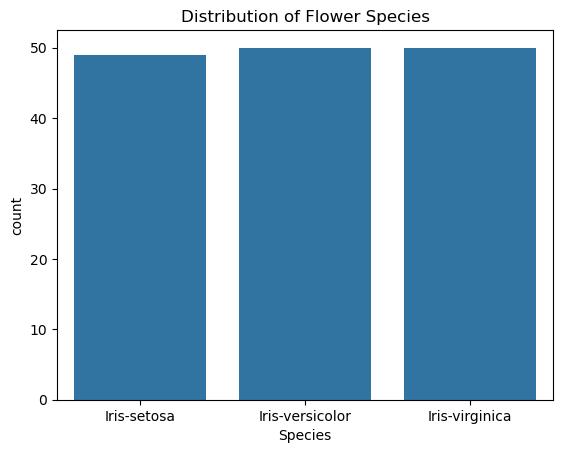

In [74]:
sns.countplot(x='Species', data=df)
plt.title("Distribution of Flower Species")
plt.show()

# Plots and Visual Interpretations 

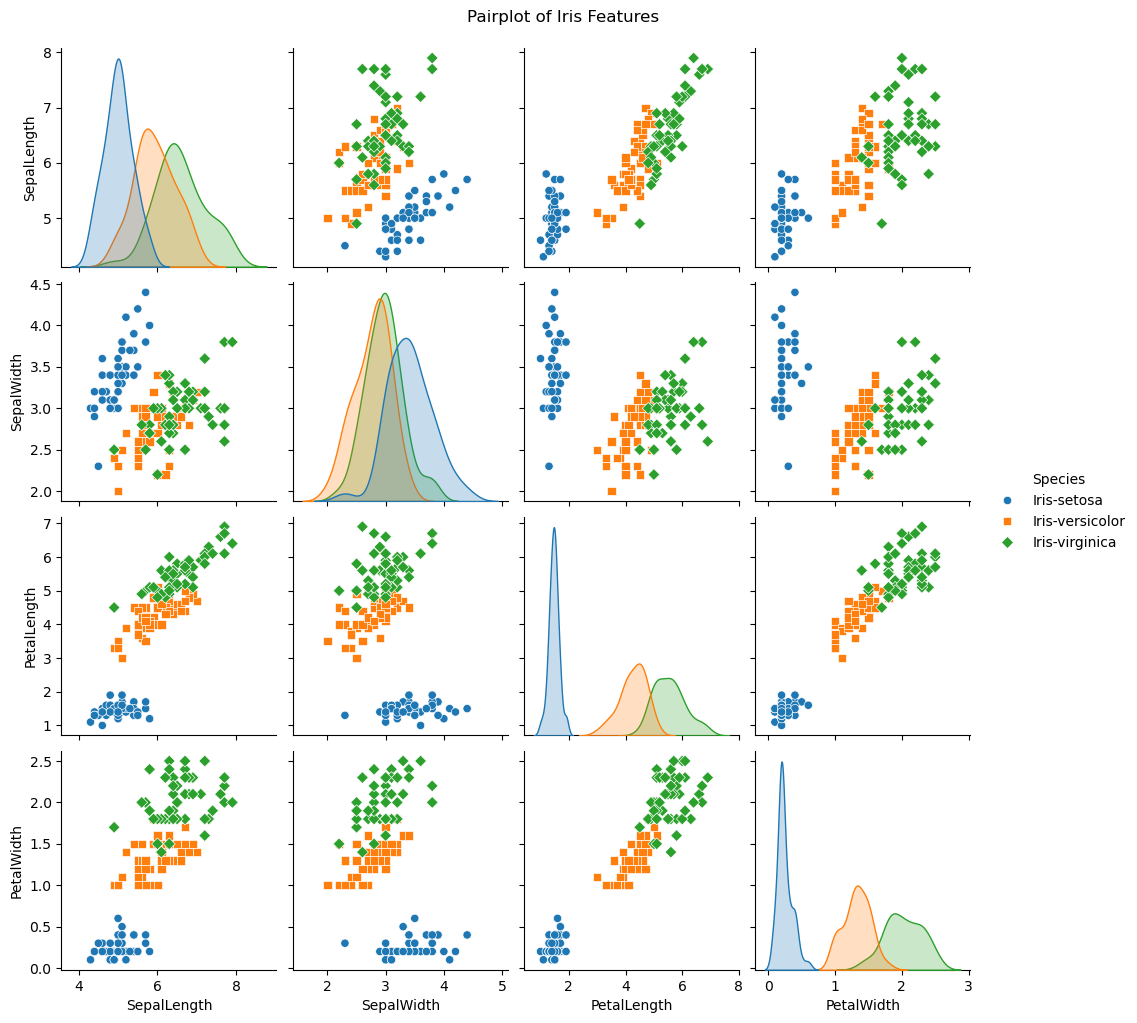

In [77]:


# 1. Scatter Plot Matrix
sns.pairplot(df, hue='Species', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


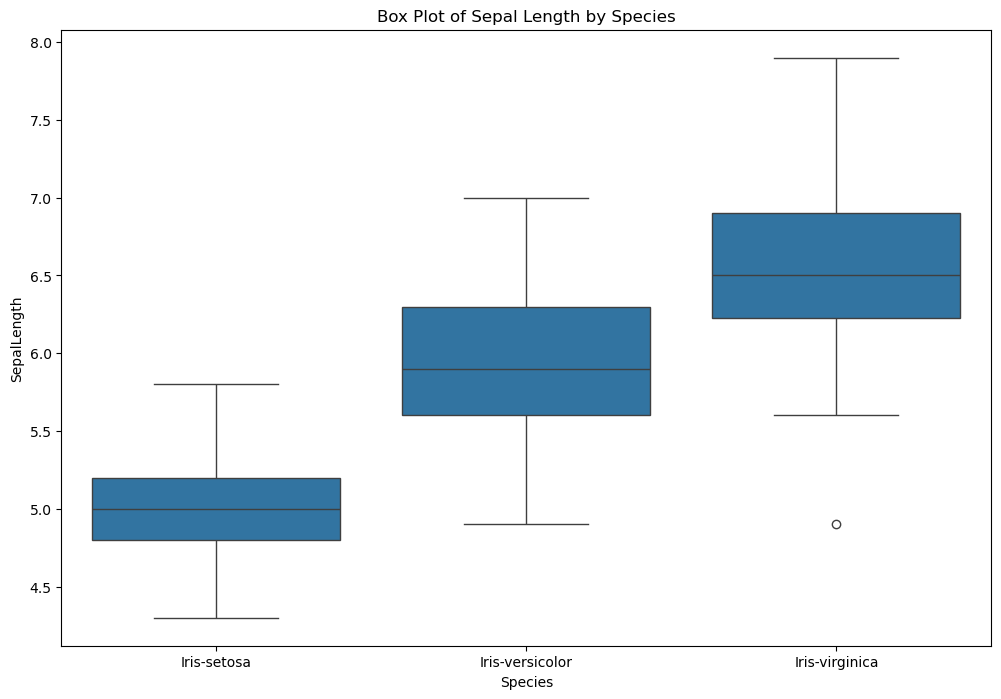

In [78]:

# 2. Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Species', y='SepalLength')
plt.title("Box Plot of Sepal Length by Species")
plt.show()


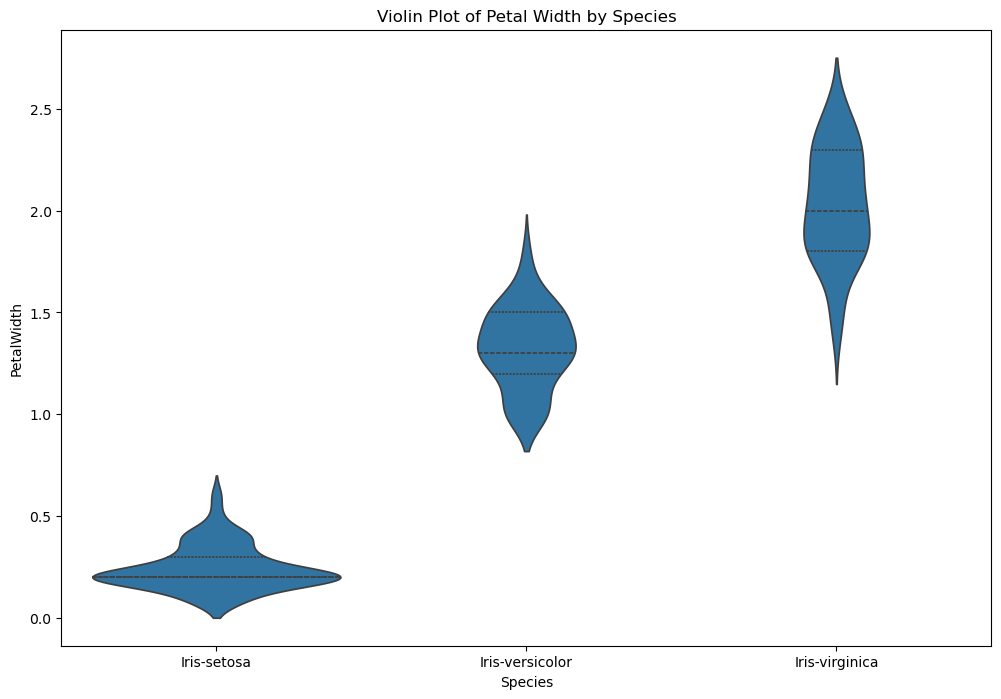

In [79]:

# 3. Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Species', y='PetalWidth', inner="quartile")
plt.title("Violin Plot of Petal Width by Species")
plt.show()


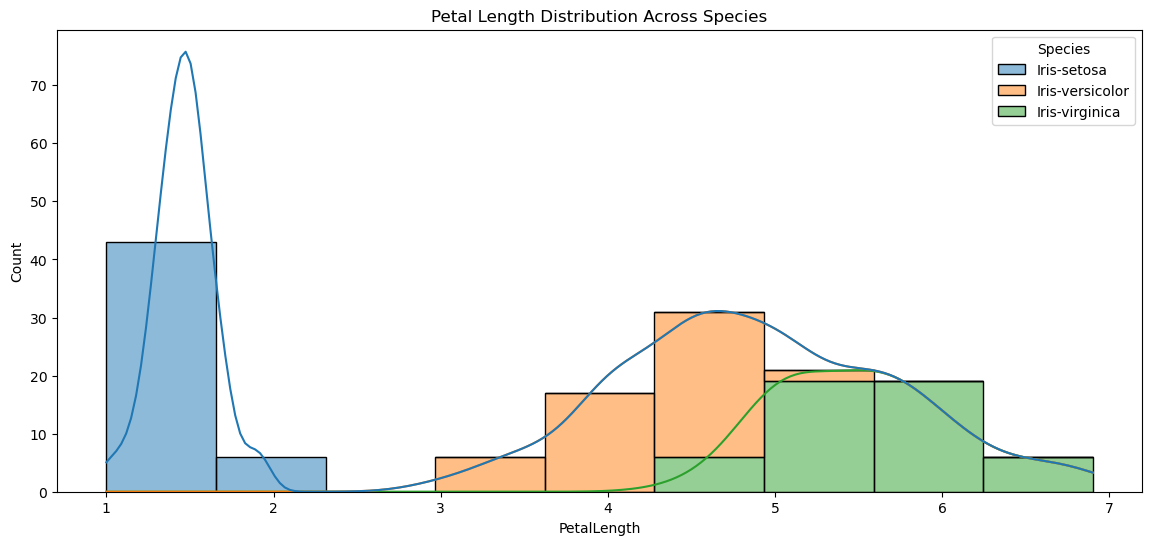

In [83]:

# 4. Distribution Comparison
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x="PetalLength", hue="Species", kde=True, multiple="stack")
plt.title("Petal Length Distribution Across Species")
plt.show()

In [85]:
x, y = df.drop(columns='Species'), df['Species']
x

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [87]:
# 2. Split the data into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [99]:

# 3. Define K-Fold Cross-Validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. List of n_estimators to try
n_estimators_list = [1, 2, 5, 8, 10 , 15, 20, 25, 30]


# Using Random Forest and K fold cross validation

In [105]:
# 5. Train Random Forest models and evaluate using K-Fold CV
import numpy as np
for n_estimators in n_estimators_list:
    print(f"Training Random Forest with n_estimators = {n_estimators}")
    
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Perform K-Fold Cross-Validation on the training data

    # Training dataset has been divided into k folds where k-1 folds is used for training and remiaining fold for testing, this is 
    # done for all folds by doing iteration

    # Reduces Overfitting:

    # If the model performs well across different folds, it suggests that the model is not overfitting to a specific subset of the data, and it's likely to generalize well to unseen data.
    # Better Performance Estimation:
    
    # K-Fold provides a more accurate estimate of model performance compared to a single train-test split because it evaluates the model on different portions of the data.
    # Utilizes All Data for Training and Testing:
    
    # Unlike a single split, where some data is unused for training, K-Fold Cross-Validation uses every data point for both training and testing, making better use of available data.
    cv_scores = cross_val_score(rf_model, x_train, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
    
    # Train the model on the entire training set
    rf_model.fit(x_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = rf_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Set Accuracy: {test_accuracy:.4f}\n")

print("Random Forest Training Completed!")

Training Random Forest with n_estimators = 1
Cross-Validation Accuracy Scores: [0.91666667 0.95833333 1.         0.91666667 0.91304348]
Mean CV Accuracy: 0.9409
Test Set Accuracy: 0.9667

Training Random Forest with n_estimators = 2
Cross-Validation Accuracy Scores: [0.91666667 0.95833333 1.         0.91666667 0.91304348]
Mean CV Accuracy: 0.9409
Test Set Accuracy: 0.9333

Training Random Forest with n_estimators = 5
Cross-Validation Accuracy Scores: [0.91666667 0.95833333 1.         0.91666667 0.86956522]
Mean CV Accuracy: 0.9322
Test Set Accuracy: 0.8667

Training Random Forest with n_estimators = 8
Cross-Validation Accuracy Scores: [0.91666667 0.95833333 1.         0.91666667 0.91304348]
Mean CV Accuracy: 0.9409
Test Set Accuracy: 0.9333

Training Random Forest with n_estimators = 10
Cross-Validation Accuracy Scores: [0.91666667 0.95833333 1.         0.91666667 0.91304348]
Mean CV Accuracy: 0.9409
Test Set Accuracy: 0.9667

Training Random Forest with n_estimators = 15
Cross-Validat

# Test Set Accuracy: 0.9667 is 96.7%